In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

## Validation of efficiencies for a 2 TeV gluino and lifetime = 1ns

#### ATLAS Values

In [2]:
nobs = 0
bg = 0.02
bg_error = 0.02
lum = 32.7
xsecSRlimit = 0.0914421298569*1e-3 #(pb) From  statistics.upperLimit(0,0.02,0.02,32.7)
#gluino xsection at mgluino=1400: 25.2977*fb, weight for 1k events = 0.8272
atlasULs = np.genfromtxt('../ATLAS_data/HEPData-ins1630632-v2-csv/Table14.csv',
                         delimiter=',',names=True,skip_header=10,skip_footer=65)

In [3]:
recastData = pd.read_pickle('./gluino_all.pcl')
# Restrict to mLSP = 100
recastData = recastData[(recastData['mLLP'] == 2000.0)]
recastData = recastData[np.round(recastData['tau_ns']) == 1.0]

,6,17
Luminosity (1/fb),32.8,32.8
$N_s$,168.4,21.69
$N_s$ Err,1.301,0.3841
AccEff,0.3171,0.04062
AccEffErr,0.002449,0.000719
VertexEff Strategy,official,official
mDV cut,10.0,10.0
Total,"(530.9, 1.0)","(534.0, 1.0)"
Total Error,"(3.099, 0.0)","(3.108, 0.0)"
Jet+MET selection,"(476.4, 0.8972)","(156.7, 0.2935)"


In [36]:
# Add sigma_UL
recastData['UL'] = xsecSRlimit/recastData['AccEff']

In [37]:
#Compute ratios
ratio = []
atlasULF = interp1d(atlasULs['Neutralino1_mass_GeV'],atlasULs['Observed_limit_pb'],fill_value='extrapolate',bounds_error=False)
for irow,row in recastData.iterrows():
    mLSP = row['mLSP']    
    ratio.append([mLSP,row['UL']/atlasULF(mLSP)])
ratio = np.array(ratio)
print(ratio)

[[1.00000000e+02 1.07697406e+00]
 [2.00000000e+02 1.07356274e+00]
 [4.00000000e+02 1.10262557e+00]
 [6.00000000e+02 1.13560939e+00]
 [8.00000000e+02 1.12650644e+00]
 [1.00000000e+03 1.12595520e+00]
 [1.20000000e+03 1.16491386e+00]
 [1.40000000e+03 1.16610944e+00]
 [1.60000000e+03 1.16750088e+00]
 [1.80000000e+03 1.02716079e+00]
 [1.87000000e+03 8.76538120e-01]
 [1.90000000e+03 5.99148733e-01]]


#### Compare values

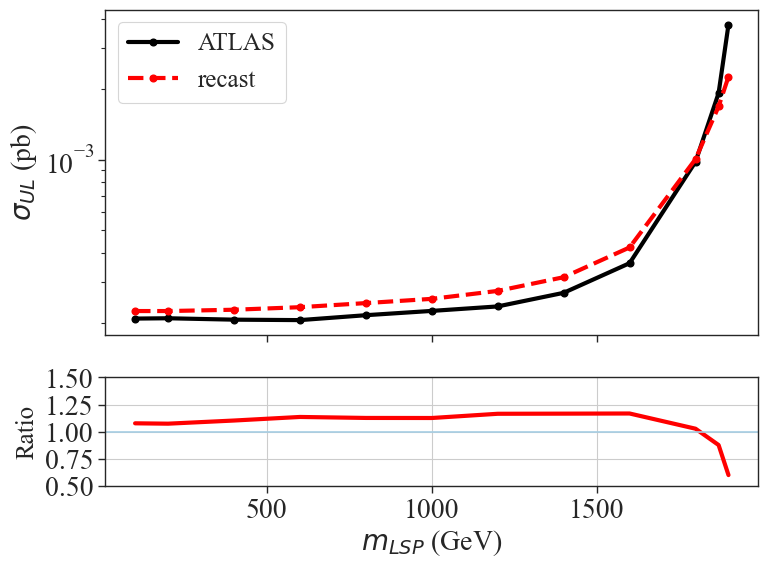

In [38]:
#Define subplots and their properties:
f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[3, 1]},figsize=(8,6))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#Plot curves
axarr[0].plot(atlasULs['Neutralino1_mass_GeV'],atlasULs['Observed_limit_pb'],'o-',color='black',linewidth=3.0,label='ATLAS')
axarr[0].plot(recastData['mLSP'],recastData['UL'],'o--',color='red',linewidth=3.0,label='recast')
axarr[0].set_ylabel(r'$\sigma_{UL}$ (pb)', fontsize=20)
axarr[0].set_yscale('log')
# axarr[0].set_xscale('log')
axarr[0].tick_params(labelsize=20)

#Plot ratio
axarr[1].plot(ratio[:,0],ratio[:,1],color='red',linewidth=3.0)
axarr[1].axhline(y=1.)
axarr[1].set_ylabel('Ratio', fontsize=18) #Y-label
# axarr[1].set_yscale('log')
axarr[1].set_xlabel(r'$m_{LSP}$ (GeV)', fontsize=20)
axarr[1].set_ylim(0.5,1.5)
axarr[1].set_yticks([0.5,0.75,1.0,1.25,1.5])
axarr[1].grid(True)
axarr[1].tick_params(labelsize=20)
axarr[0].legend(fontsize=18)
f.tight_layout()
plt.show()

In [39]:
f.savefig('validationPlot_mgluino2000_tau1ns.png')
# f.savefig('validationPlot_mgluino2000_tau1ns.pdf')